1. Estatísticas descritivas:
           alcool  acido_malico    magnesio       matiz
count  178.000000    178.000000  178.000000  178.000000
mean    13.000618      2.336348   99.741573    0.957449
std      0.811827      1.117146   14.282484    0.228572
min     11.030000      0.740000   70.000000    0.480000
25%     12.362500      1.602500   88.000000    0.782500
50%     13.050000      1.865000   98.000000    0.965000
75%     13.677500      3.082500  107.000000    1.120000
max     14.830000      5.800000  162.000000    1.710000

Contagem das Classes:
classe
2    71
1    59
3    48
Name: count, dtype: int64 

2. Boxplots para dispersão dos dados:


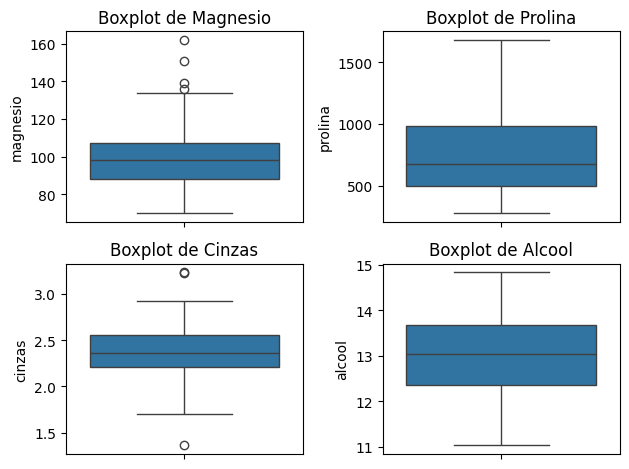

Boxplots segregados por Classe:


<Figure size 400x200 with 0 Axes>

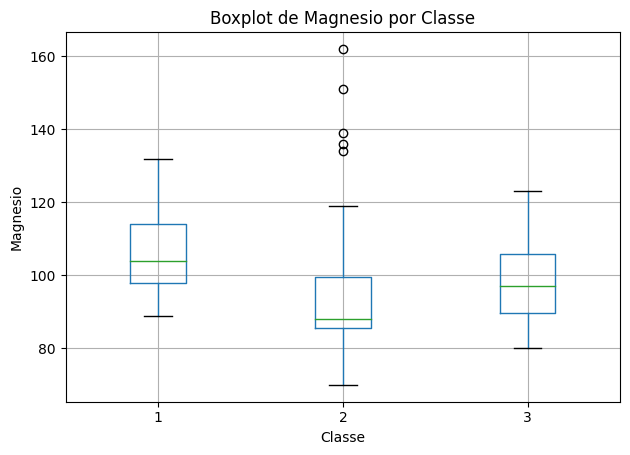

<Figure size 400x200 with 0 Axes>

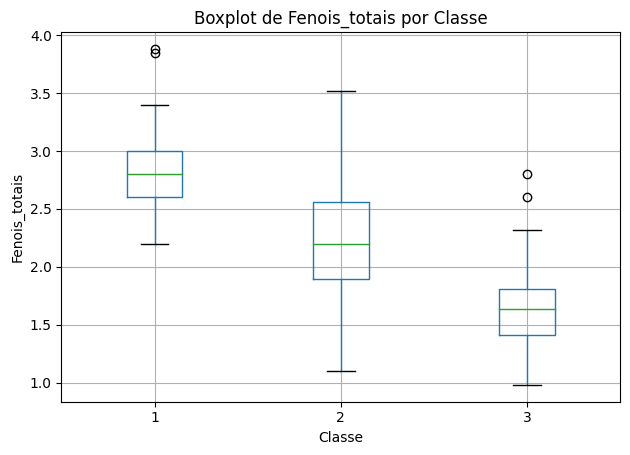

<Figure size 400x200 with 0 Axes>

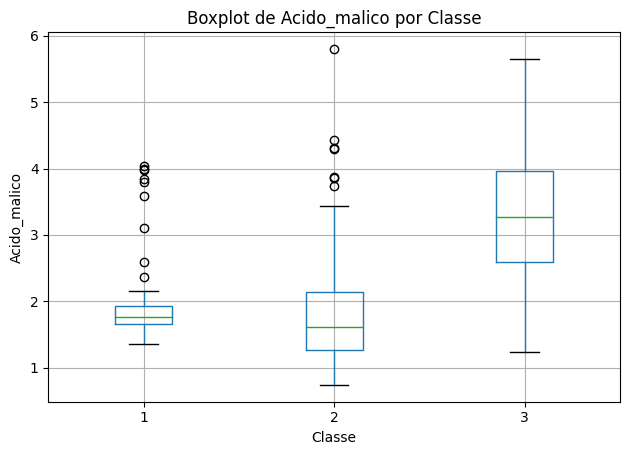

<Figure size 400x200 with 0 Axes>

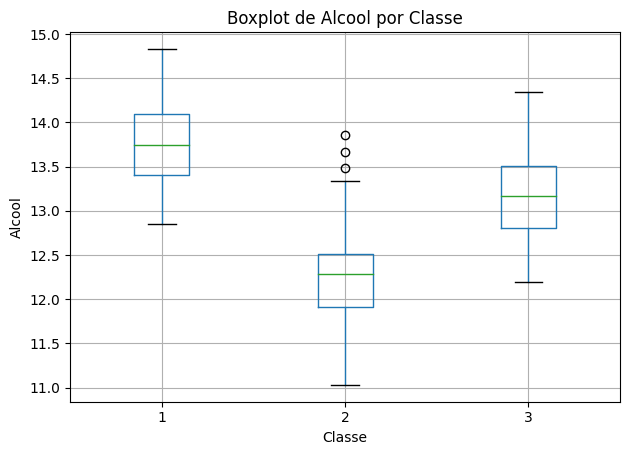

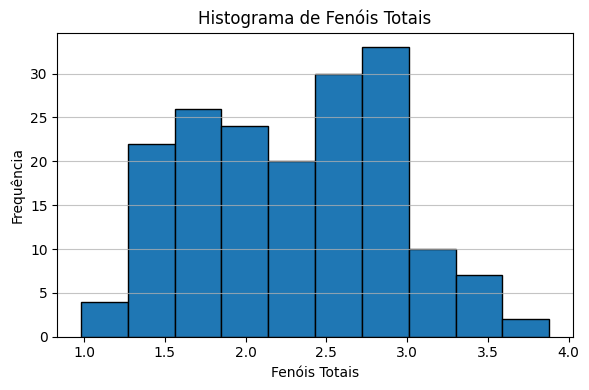

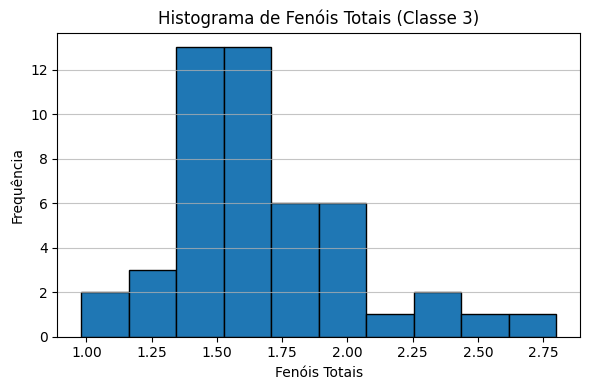

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL do dataset Wine
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Nome das colunas em português BR
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

# Ler o arquivo CSV com as colunas especificadas, definindo a coluna 'classe' como object
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

# Colunas para os boxplots
colunas = ['magnesio', 'fenois_totais', 'acido_malico', 'alcool']

# Filtrar os dados para a classe 3
vinhos_classe_3 = vinhos[vinhos['classe'] == '3']

# 1. Análise Exploratória de Variáveis

# Estatísticas descritivas para as colunas escolhidas
print("1. Estatísticas descritivas:")
estatisticas_descritivas = vinhos[['alcool', 'acido_malico', 'magnesio', 'matiz']].describe()
print(estatisticas_descritivas)

# Contar os valores únicos na coluna classe.
contagem_classes = vinhos['classe'].value_counts()
print("\nContagem das Classes:")
print(f"{contagem_classes} \n")

# 2. Criando boxplots para explorar a dispersão dos dados

# Boxplot para 'magnesio'
print("2. Boxplots para dispersão dos dados:")
plt.subplot(2, 2, 1)
sns.boxplot(y='magnesio', data=vinhos)
plt.title('Boxplot de Magnesio')

# Boxplot para 'prolina'
plt.subplot(2, 2, 2)
sns.boxplot(y='prolina', data=vinhos)
plt.title('Boxplot de Prolina')

# Boxplot para 'cinzas'
plt.subplot(2, 2, 3)
sns.boxplot(y='cinzas', data=vinhos)
plt.title('Boxplot de Cinzas')

# Boxplot para 'alcool'
plt.subplot(2, 2, 4)
sns.boxplot(y='alcool', data=vinhos)
plt.title('Boxplot de Alcool')

# Ajustar layout
plt.tight_layout()
plt.show()

# 3. Criando Boxplots Segregados por Classe
print("Boxplots segregados por Classe:")
for col in colunas:
    plt.figure(figsize=(4, 2))  # Configurar o tamanho da figura
    vinhos.boxplot(column=col, by='classe')
    plt.title(f'Boxplot de {col.capitalize()} por Classe')
    plt.suptitle('')  # Remove o título padrão gerado pelo boxplot
    plt.xlabel('Classe')
    plt.ylabel(col.capitalize())
    plt.tight_layout()
    plt.show()  # Exibir cada boxplot individualmente

# 4. Criando um histograma para visualizar a distribuição dos dados (usando Matplotlib)
plt.figure(figsize=(6, 4))
plt.hist(vinhos['fenois_totais'], bins=10, edgecolor='black')
plt.title('Histograma de Fenóis Totais')
plt.xlabel('Fenóis Totais')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# Criando um histograma da coluna fenois_totais, filtrando apenas a classe 3
plt.figure(figsize=(6, 4))
plt.hist(vinhos_classe_3['fenois_totais'], bins=10, edgecolor='black')
plt.title('Histograma de Fenóis Totais (Classe 3)')
plt.xlabel('Fenóis Totais')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()